Hospital_Prediction_revisit


In [244]:
# Required imports
import pandas as pd            # For handling data structures
import numpy as np             # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns          # For advanced visualizations (heatmap)








In [245]:
# Load the dataset
df = pd.read_csv('data/diabetic_data.csv')

In [246]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [247]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [248]:
df.shape

(101766, 50)

In [249]:
df.dtypes


encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [250]:
# Identifying columns with missing values marked by '?' in the dataset
for column in df.columns:
    if df[column].dtype == 'object':
        missing_count = (df[column] == '?').sum()
        print(column, missing_count)


race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [251]:
# Custom count for gender where it was recorded as 'Unknown/Invalid'
invalid_gender_count = (df['gender'] == 'Unknown/Invalid').sum()
print('gender', invalid_gender_count)


gender 3


In [252]:
#Handling Missing Values

In [253]:
# Removing columns with a significant amount of missing data
df.drop(columns=['weight', 'payer_code', 'medical_specialty'], inplace=True)


In [254]:
# Identifying rows to drop based on conditions across multiple columns
drop_idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)

drop_idx.update(df[df['diag_1'] == '?'].index)
drop_idx.update(df[df['diag_2'] == '?'].index)
drop_idx.update(df[df['diag_3'] == '?'].index)
drop_idx.update(df[df['race'] == '?'].index)
drop_idx.update(df[df['discharge_disposition_id'] == 11].index)
drop_idx.update(df[df['gender'] == 'Unknown/Invalid'].index)




In [255]:
# Creating a new index list excluding the identified rows
valid_idx = df.index.difference(drop_idx)



In [256]:
# Reassigning the DataFrame with the valid rows
df = df.loc[valid_idx]

In [257]:
# Removing the 'citoglipton' and 'examide' columns from the DataFrame
df.drop(columns=['citoglipton', 'examide'], inplace=True)


In [258]:
# Checking for missing values in columns with object data type
for column in df.select_dtypes(include='object').columns:
    missing_count = (df[column] == '?').sum()
    print(column, missing_count)




race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [259]:
# Counting invalid entries in the 'gender' column
invalid_gender_count = (df['gender'] == 'Unknown/Invalid').sum()
print('gender', invalid_gender_count)

gender 0


Feature Engineering

In [260]:
# Calculating service utilization by summing outpatient, emergency, and inpatient visits
df['service_utilization'] = df[['number_outpatient', 'number_emergency', 'number_inpatient']].sum(axis=1)


In [261]:
# Creating a list of medication columns to track changes
medication_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
                      'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 
                      'tolazamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 
                      'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# Creating temporary columns to encode medication changes
for medication in medication_columns:
    temp_column = medication + '_temp'
    df[temp_column] = df[medication].apply(lambda x: 0 if x in ['No', 'Steady'] else 1)

# Summing the changes across the medications into a new column
df['num_med_changes'] = df[[med + '_temp' for med in medication_columns]].sum(axis=1)




In [262]:
# Dropping the temporary columns
df.drop(columns=[med + '_temp' for med in medication_columns], inplace=True)



In [263]:
# Displaying the count of medication changes
df['num_med_changes'].value_counts()

num_med_changes
0    70142
1    24922
2     1271
3      106
4        5
Name: count, dtype: int64

In [264]:
# Re-encoding 'admission_type_id' into fewer categories
df['admission_type_id'].replace({2: 1, 7: 1, 6: 5, 8: 5}, inplace=True)

# Re-encoding 'discharge_disposition_id' into fewer categories
df['discharge_disposition_id'].replace({
    6: 1, 8: 1, 9: 1, 13: 1,
    3: 2, 4: 2, 5: 2, 14: 2, 22: 2, 23: 2, 24: 2,
    12: 10, 15: 10, 16: 10, 17: 10,
    25: 18, 26: 18
}, inplace=True)

# Re-encoding 'admission_source_id' into fewer categories
df['admission_source_id'].replace({
    2: 1, 3: 1,
    5: 4, 6: 4, 10: 4, 22: 4, 25: 4,
    15: 9, 17: 9, 20: 9, 21: 9,
    13: 11, 14: 11
}, inplace=True)


In [265]:
# Re-encoding categorical columns into binary format
df['change'].replace({'Ch': 1, 'No': 0}, inplace=True)
df['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)
df['diabetesMed'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Re-encoding medication change columns
for medication in medication_columns:
    df[medication].replace({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1}, inplace=True)


In [266]:
# Encoding the A1Cresult column
df['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0, 'None': -99}, inplace=True)

# Encoding the max_glu_serum column
df['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'None': -99}, inplace=True)


In [267]:
# Categorizing age intervals into groups from 1 to 10
for i in range(10):
    age_range = f'[{10 * i}-{10 * (i + 1)})'
    df['age'].replace(age_range, i + 1, inplace=True)

# Display the count of each age category
df['age'].value_counts()


age
8     24815
7     21521
6     16546
9     16223
5      9208
4      3538
10     2594
3      1471
2       466
1        64
Name: count, dtype: int64

In [268]:
# Removing duplicate entries based on patient_nbr and keeping the first occurrence
df2 = df.drop_duplicates(subset=['patient_nbr'], keep='first')

# Display the shape of the new DataFrame
df2_shape = df2.shape
print(df2_shape)  


(67580, 47)


In [269]:
# Displaying the first five rows of the DataFrame transposed
df_transposed = df.head().T
print(df_transposed)


                                  1                2          3          4  \
encounter_id                 149190            64410     500364      16680   
patient_nbr                55629189         86047875   82442376   42519267   
race                      Caucasian  AfricanAmerican  Caucasian  Caucasian   
gender                            0                0          1          1   
age                               2                3          4          5   
admission_type_id                 1                1          1          1   
discharge_disposition_id          1                1          1          1   
admission_source_id               7                7          7          7   
time_in_hospital                  3                2          2          1   
num_lab_procedures               59               11         44         51   
num_procedures                    0                5          1          0   
num_medications                  18               13         16 

In [270]:
# Counting occurrences of each category in the 'readmitted' column
readmission_counts = df['readmitted'].value_counts()
print(readmission_counts)


readmitted
NO     50731
>30    34649
<30    11066
Name: count, dtype: int64


In [271]:
# Replacing values in the 'readmitted' column with numerical codes
df['readmitted'].replace({'>30': 0, '<30': 1, 'NO': 0}, inplace=True)


In [272]:
# Adding new columns for diagnosis levels based on existing diagnosis columns
df['level1_diag1'] = df['diag_1']
df['level2_diag1'] = df['diag_1']
df['level1_diag2'] = df['diag_2']
df['level2_diag2'] = df['diag_2']
df['level1_diag3'] = df['diag_3']
df['level2_diag3'] = df['diag_3']


In [273]:
# Set diagnosis level columns to 0 if they contain 'V' or 'E'
for i in range(1, 4):
    df.loc[df[f'diag_{i}'].str.contains('V'), [f'level1_diag{i}', f'level2_diag{i}']] = 0
    df.loc[df[f'diag_{i}'].str.contains('E'), [f'level1_diag{i}', f'level2_diag{i}']] = 0

# Replace '?' with -1 in diagnosis level columns
for i in range(1, 4):
    df[f'level1_diag{i}'] = df[f'level1_diag{i}'].replace('?', -1)
    df[f'level2_diag{i}'] = df[f'level2_diag{i}'].replace('?', -1)


In [274]:
# Convert diagnosis level columns to float
for i in range(1, 4):
    df[f'level1_diag{i}'] = df[f'level1_diag{i}'].astype(float)
    df[f'level2_diag{i}'] = df[f'level2_diag{i}'].astype(float)


In [275]:
import numpy as np

# Function to categorize diagnosis levels
def categorize_diag(level_diag):
    if (level_diag >= 390 and level_diag < 460) or (np.floor(level_diag) == 785):
        return 1
    elif (level_diag >= 460 and level_diag < 520) or (np.floor(level_diag) == 786):
        return 2
    elif (level_diag >= 520 and level_diag < 580) or (np.floor(level_diag) == 787):
        return 3
    elif np.floor(level_diag) == 250:
        return 4
    elif (level_diag >= 800 and level_diag < 1000):
        return 5
    elif (level_diag >= 710 and level_diag < 740):
        return 6
    elif (level_diag >= 580 and level_diag < 630) or (np.floor(level_diag) == 788):
        return 7
    elif (level_diag >= 140 and level_diag < 240):
        return 8
    else:
        return 0

# Apply the function to each diagnosis level column
for i in range(1, 4):
    df[f'level1_diag{i}'] = df[f'level1_diag{i}'].apply(categorize_diag)


Data Visualization

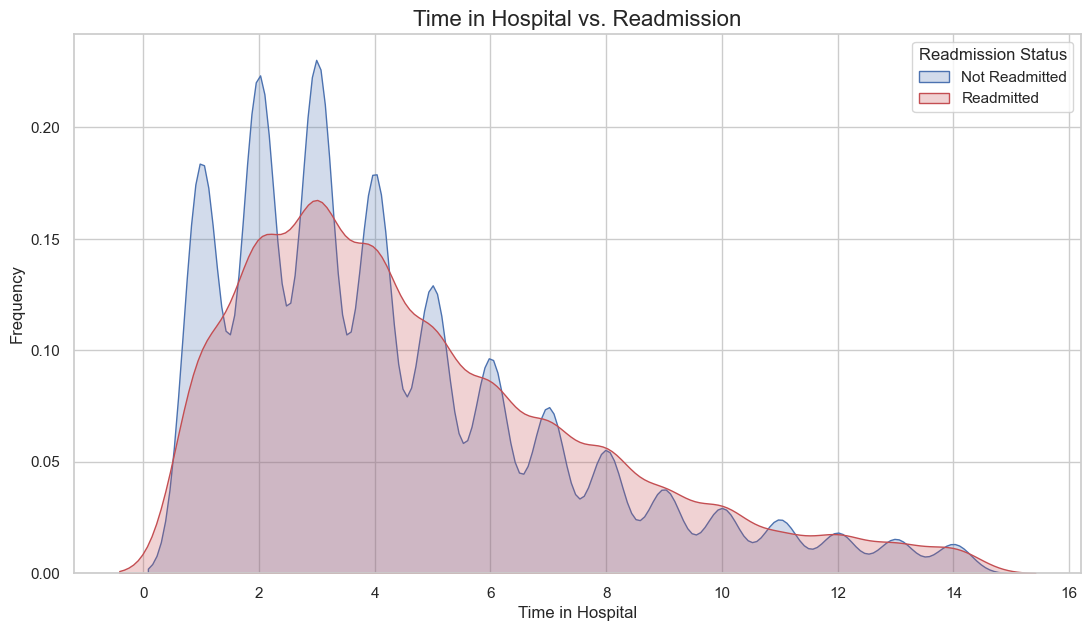

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create the figure
fig = plt.figure(figsize=(13, 7))

# Plot KDE for not readmitted patients with fill parameter
ax = sns.kdeplot(df.loc[df['readmitted'] == 0, 'time_in_hospital'], 
                 color='b', fill=True, label='Not Readmitted')

# Plot KDE for readmitted patients with fill parameter
ax = sns.kdeplot(df.loc[df['readmitted'] == 1, 'time_in_hospital'], 
                 color='r', fill=True, label='Readmitted')

# Set the labels and title
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital vs. Readmission', fontsize=16)

# Add a legend
plt.legend(title='Readmission Status')

# Show the plot
plt.show()


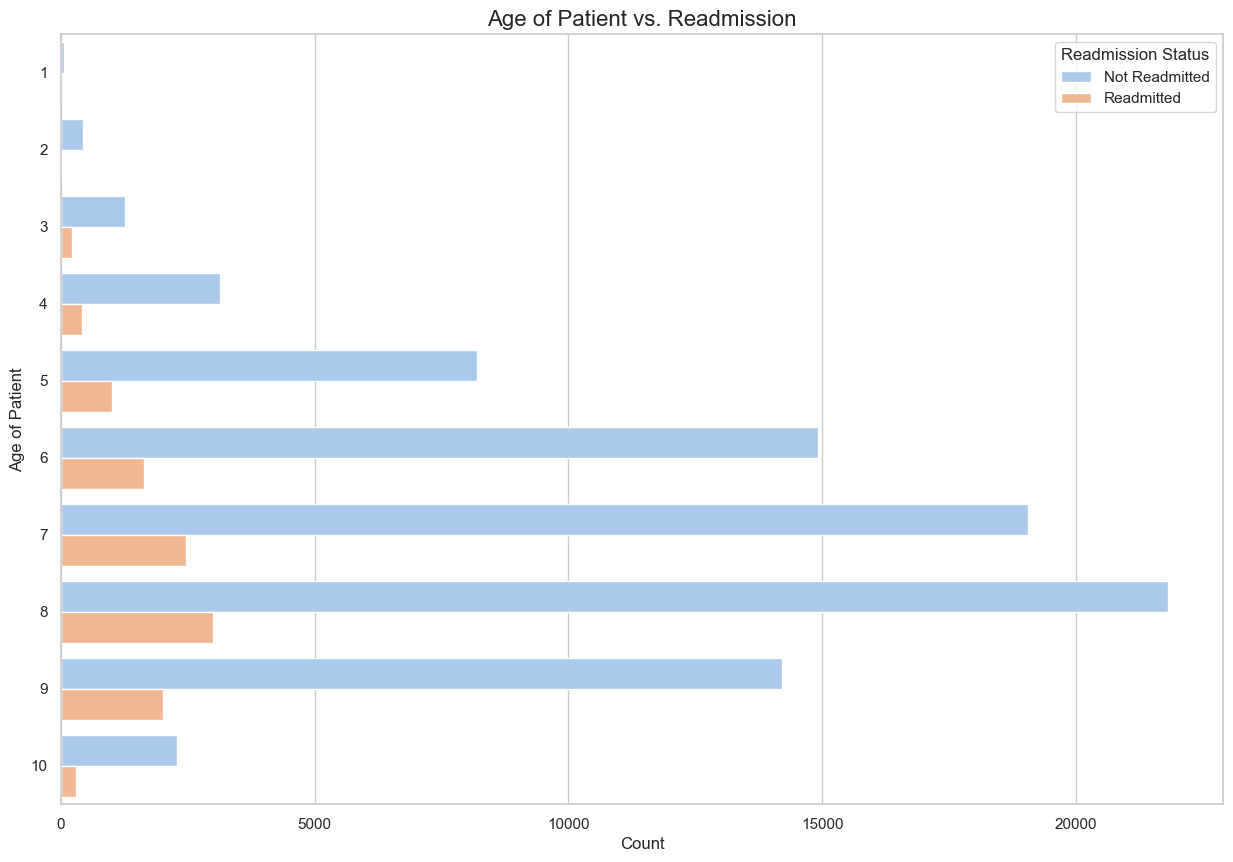

In [277]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create the figure
fig = plt.figure(figsize=(15, 10))

# Create the count plot
sns.countplot(y=df['age'], hue=df['readmitted'], palette='pastel')

# Set the title
plt.title('Age of Patient vs. Readmission', fontsize=16)

# Set labels for the axes
plt.xlabel('Count')
plt.ylabel('Age of Patient')

# Add a legend
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])

# Show the plot
plt.show()

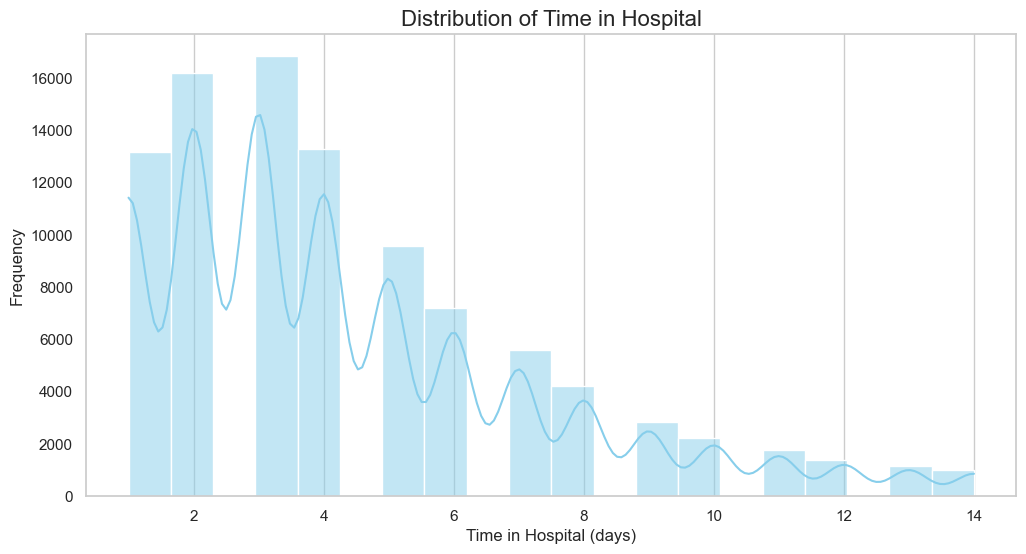

In [278]:
plt.figure(figsize=(12, 6))
sns.histplot(df['time_in_hospital'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Time in Hospital', fontsize=16)
plt.xlabel('Time in Hospital (days)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


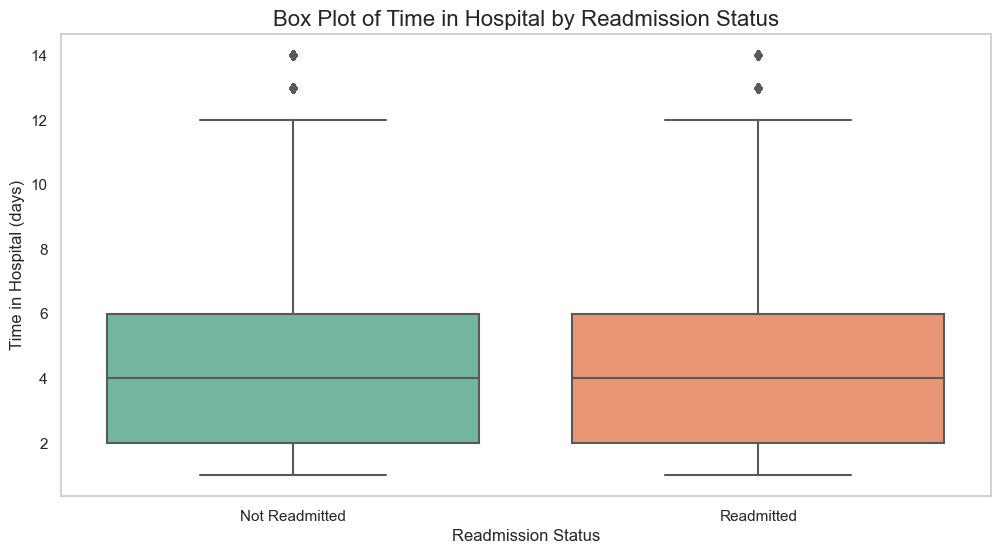

In [279]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=df, palette='Set2')
plt.title('Box Plot of Time in Hospital by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status')
plt.ylabel('Time in Hospital (days)')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.grid(axis='y')
plt.show()


C:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


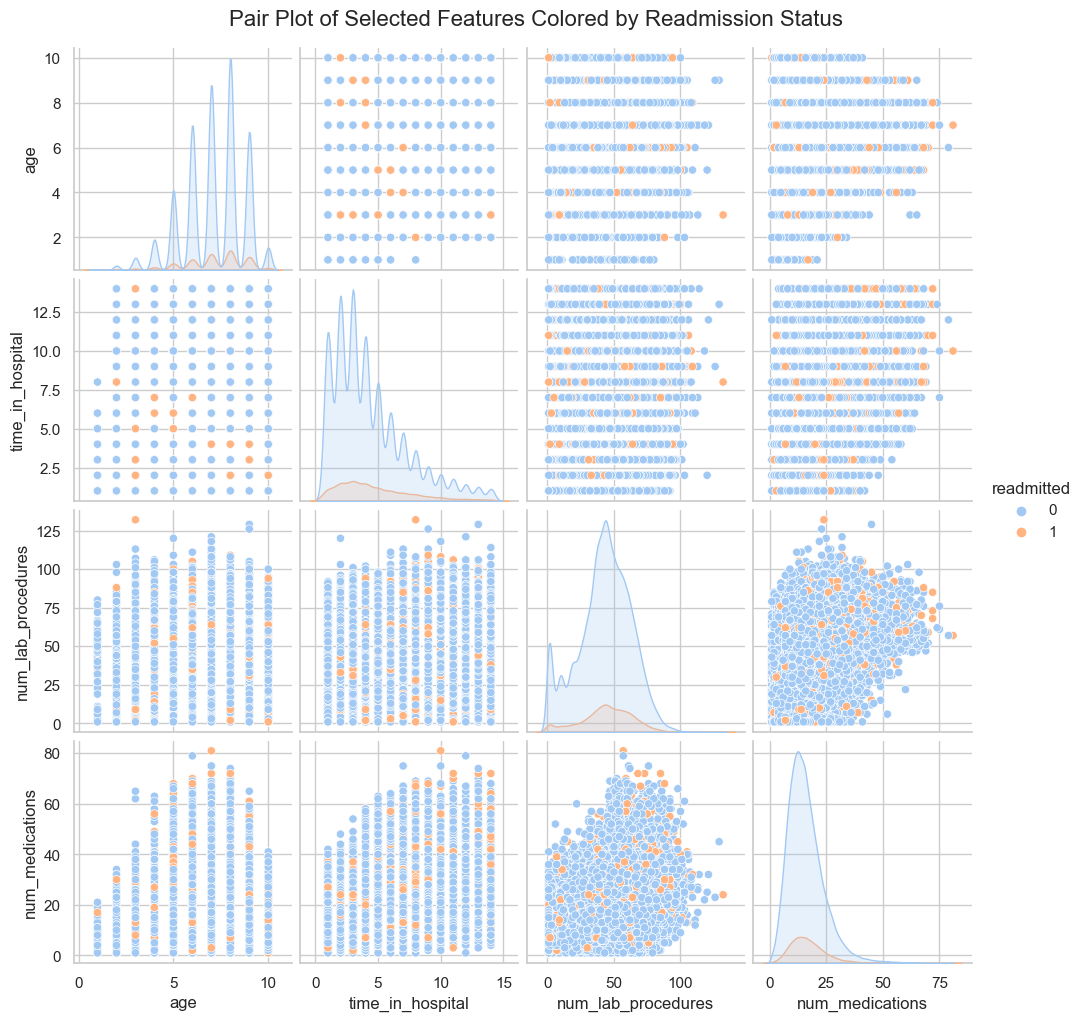

In [280]:
# Select a subset of relevant features
subset = df[['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications', 'readmitted']]
sns.pairplot(subset, hue='readmitted', palette='pastel', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features Colored by Readmission Status', y=1.02, fontsize=16)
plt.show()


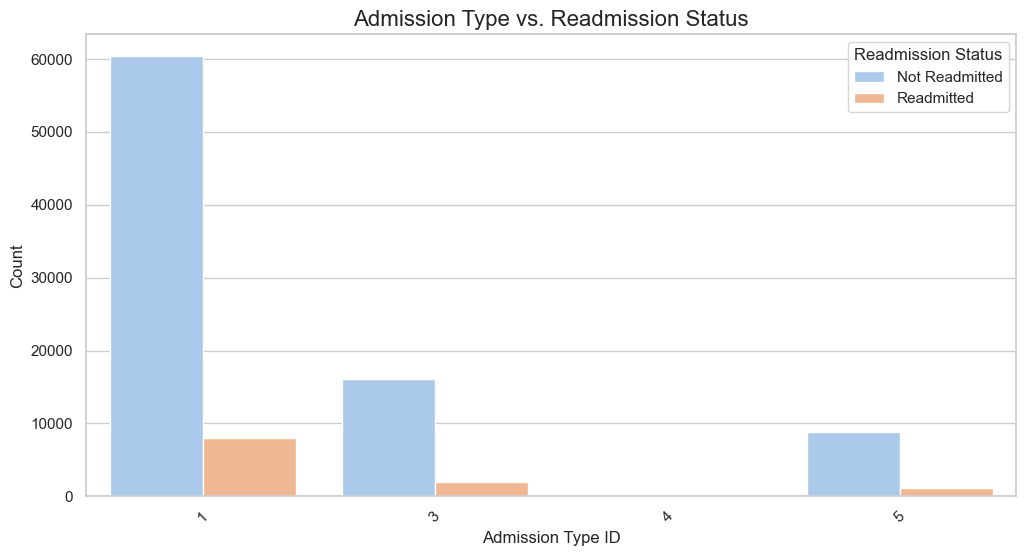

In [281]:
plt.figure(figsize=(12, 6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df, palette='pastel')
plt.title('Admission Type vs. Readmission Status', fontsize=16)
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


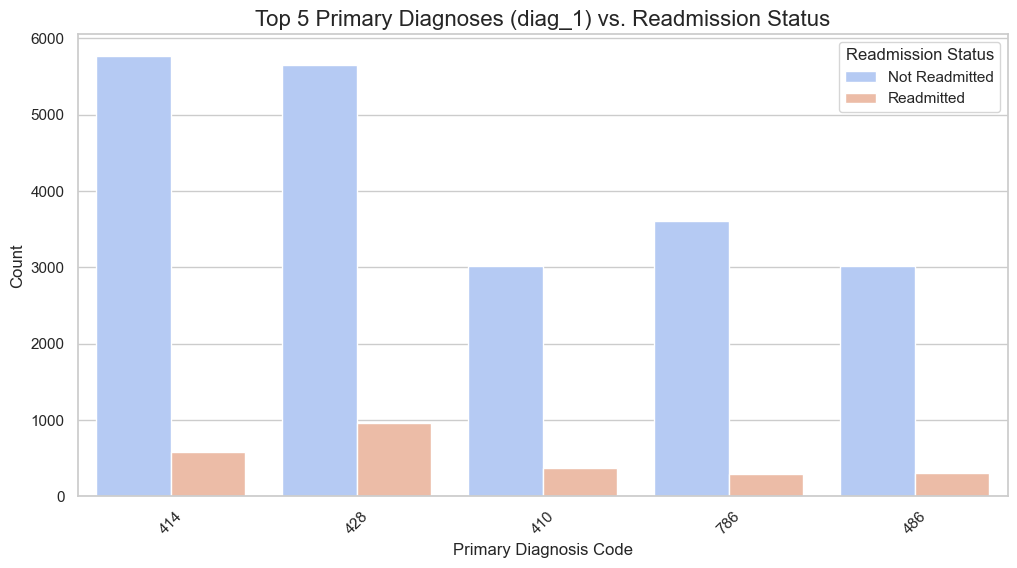

In [282]:
# Top 5 most frequent diagnoses in diag_1
top_diag1 = df['diag_1'].value_counts().head(5).index

# Filter dataset for these diagnoses
df_top_diag1 = df[df['diag_1'].isin(top_diag1)]

plt.figure(figsize=(12, 6))
sns.countplot(x='diag_1', hue='readmitted', data=df_top_diag1, palette='coolwarm')
plt.title('Top 5 Primary Diagnoses (diag_1) vs. Readmission Status', fontsize=16)
plt.xlabel('Primary Diagnosis Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.show()


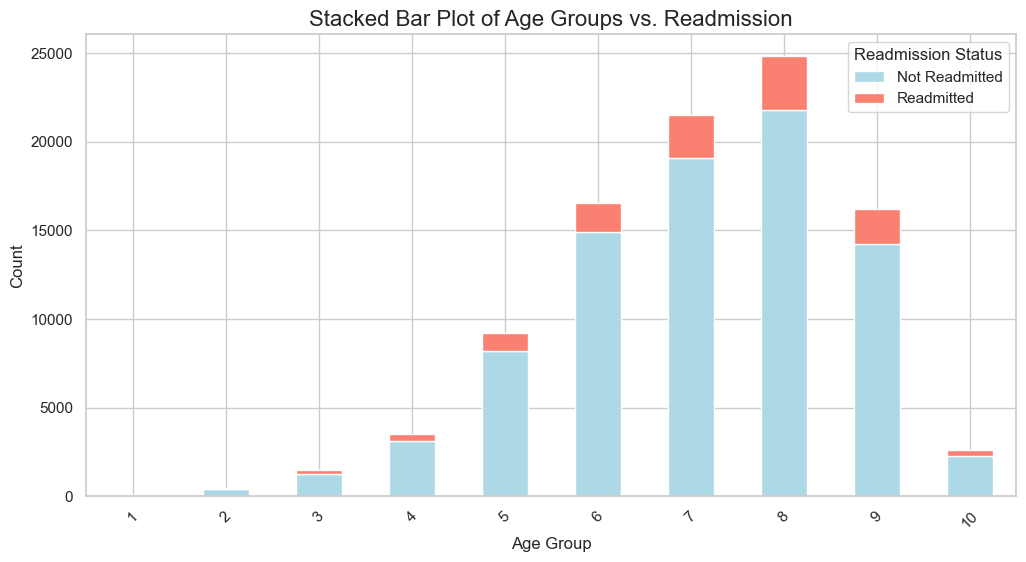

In [283]:
age_counts = df.groupby(['age', 'readmitted']).size().unstack()
age_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Bar Plot of Age Groups vs. Readmission', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


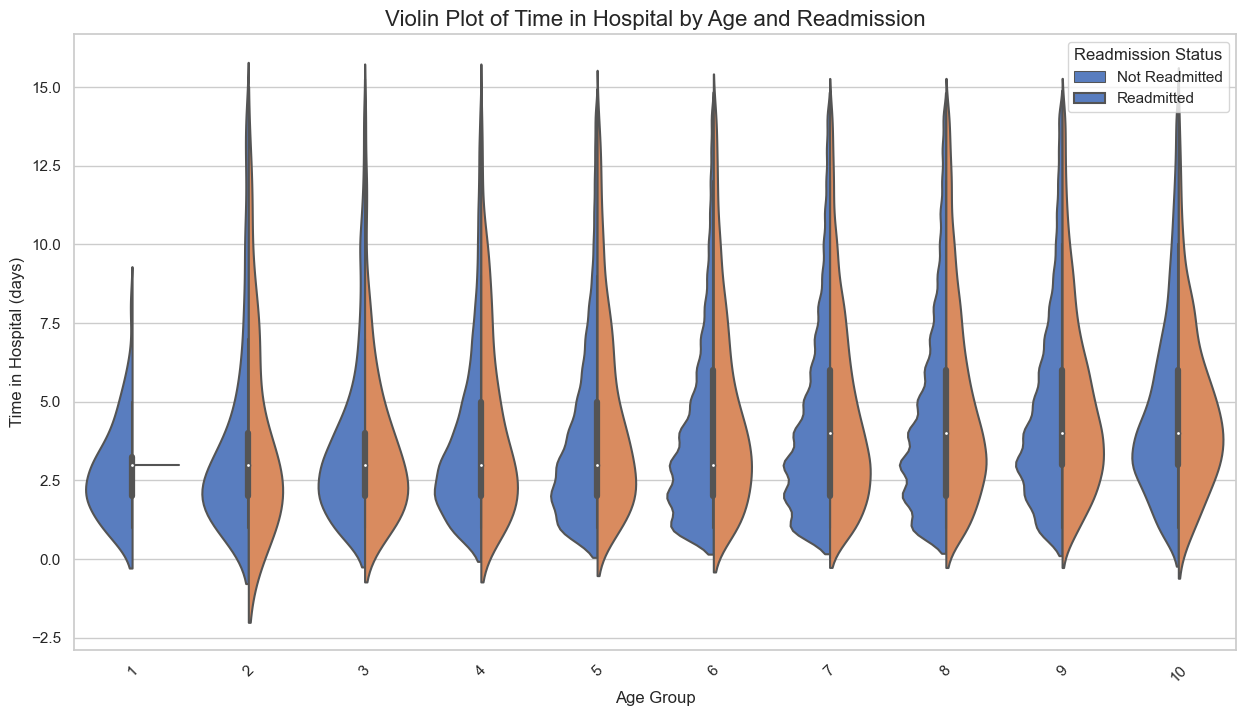

In [284]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='age', y='time_in_hospital', hue='readmitted', data=df, split=True, palette='muted')
plt.title('Violin Plot of Time in Hospital by Age and Readmission', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Time in Hospital (days)')
plt.xticks(rotation=45)
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.show()


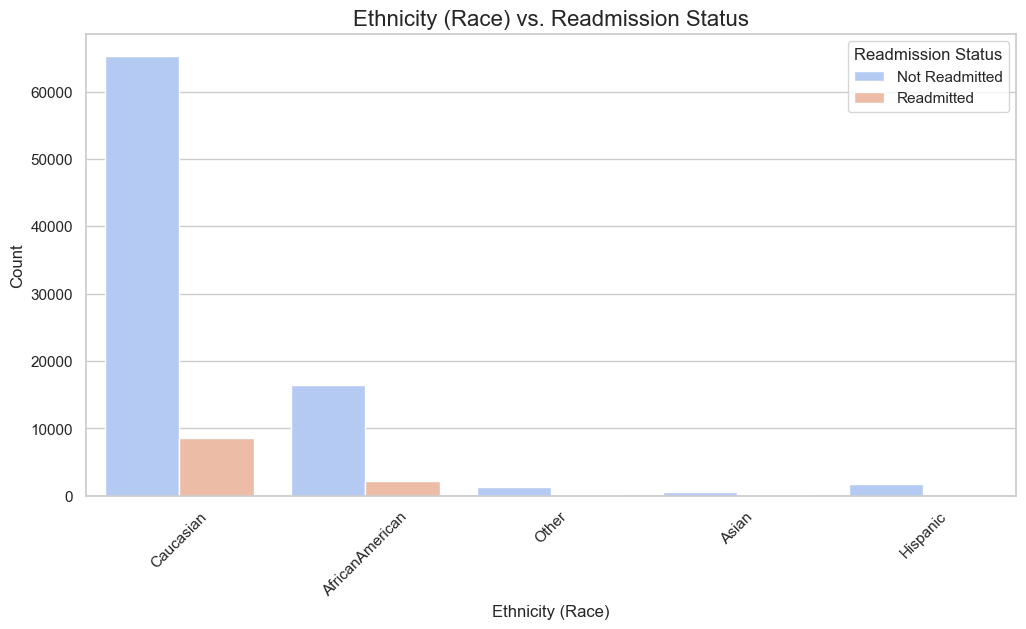

In [285]:
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='readmitted', data=df, palette='coolwarm')
plt.title('Ethnicity (Race) vs. Readmission Status', fontsize=16)
plt.xlabel('Ethnicity (Race)')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


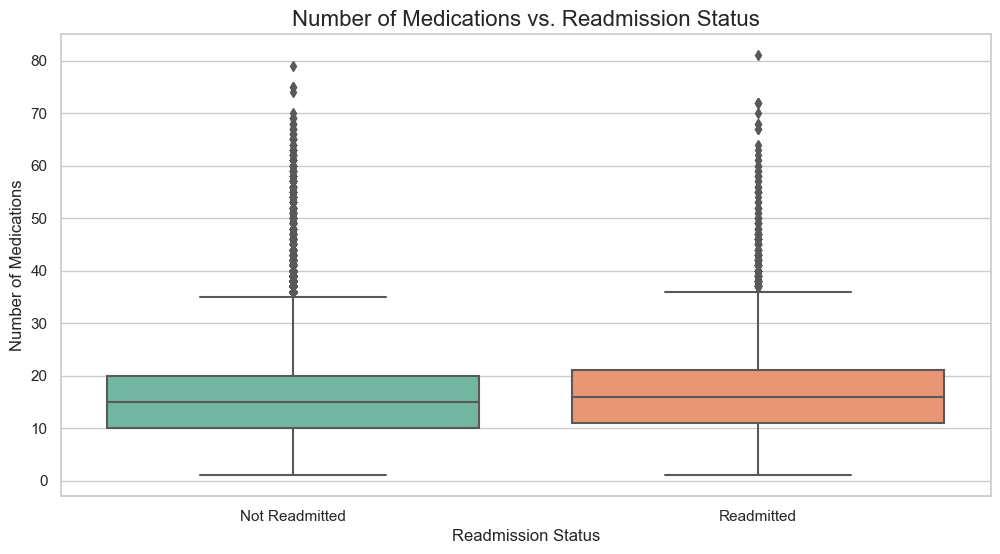

In [286]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set2')
plt.title('Number of Medications vs. Readmission Status', fontsize=16)
plt.xlabel('Readmission Status')
plt.ylabel('Number of Medications')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()


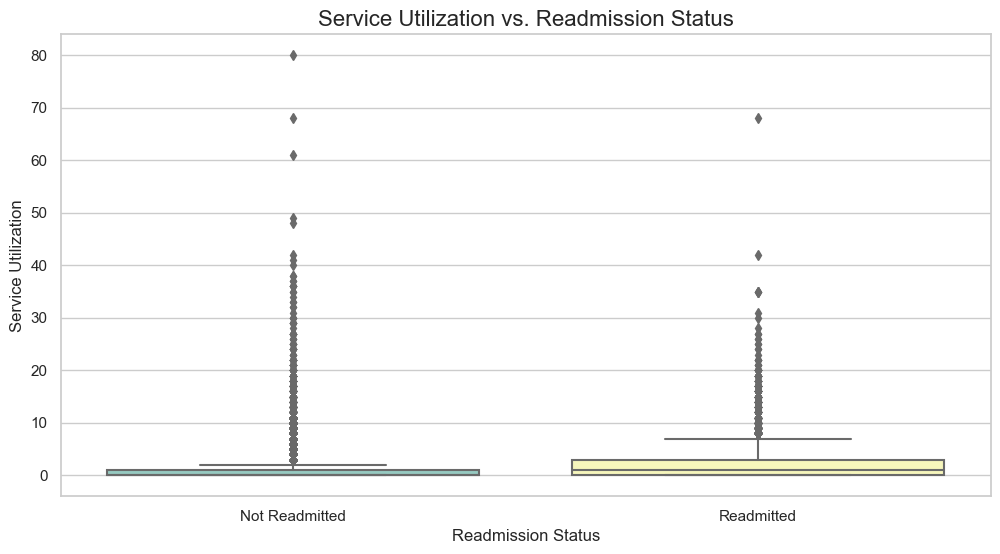

In [287]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='service_utilization', data=df, palette='Set3')
plt.title('Service Utilization vs. Readmission Status', fontsize=16)
plt.xlabel('Readmission Status')
plt.ylabel('Service Utilization')
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()


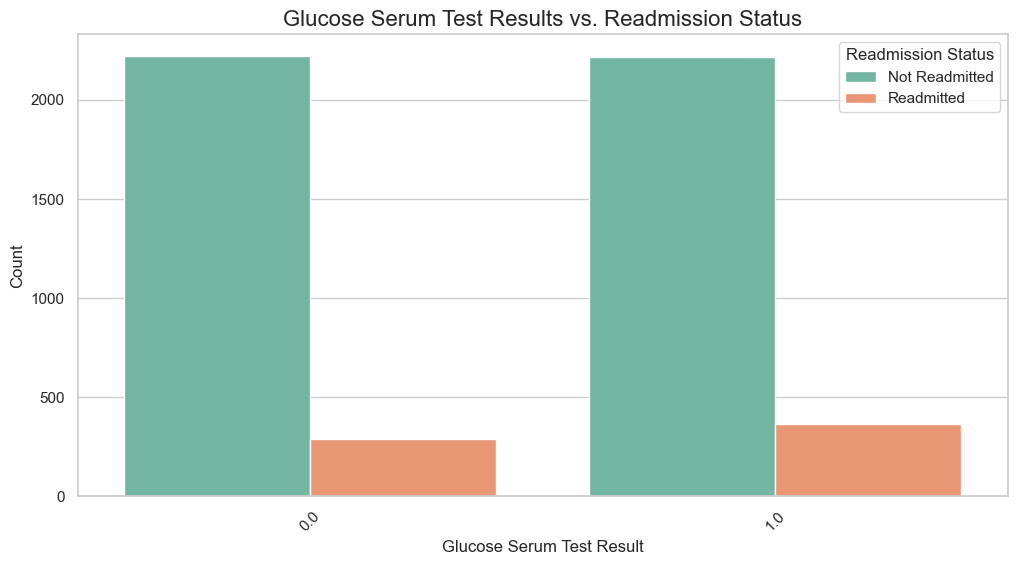

In [288]:
plt.figure(figsize=(12, 6))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df, palette='Set2')
plt.title('Glucose Serum Test Results vs. Readmission Status', fontsize=16)
plt.xlabel('Glucose Serum Test Result')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


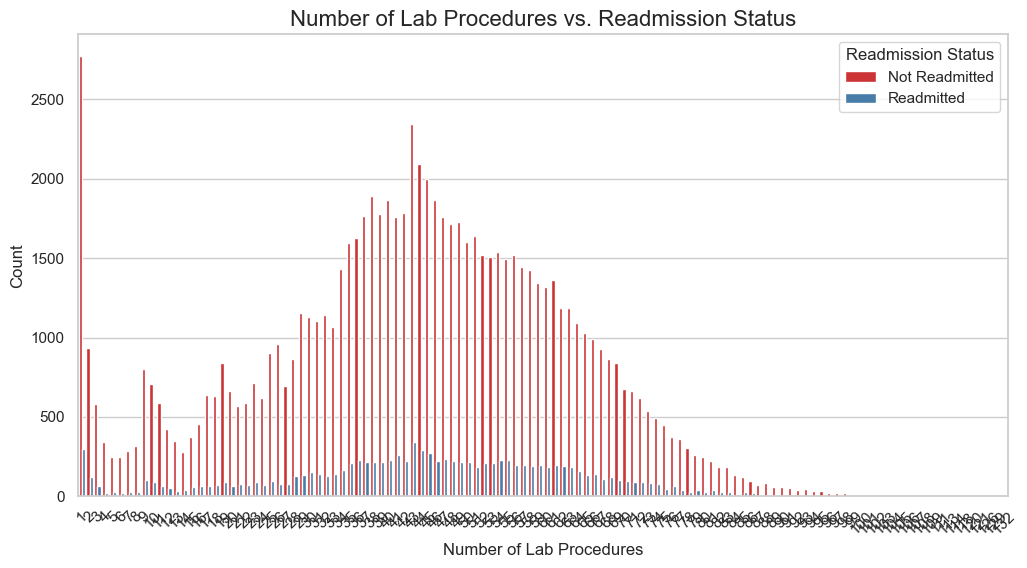

In [289]:
plt.figure(figsize=(12, 6))
sns.countplot(x='num_lab_procedures', hue='readmitted', data=df, palette='Set1')
plt.title('Number of Lab Procedures vs. Readmission Status', fontsize=16)
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Count')
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


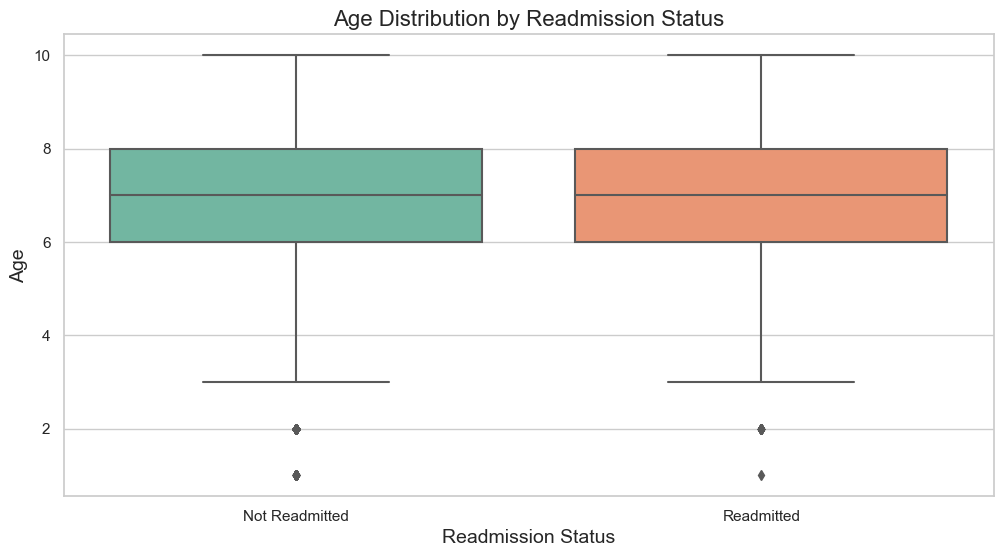

In [290]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='age', data=df, palette='Set2')
plt.title('Age Distribution by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()


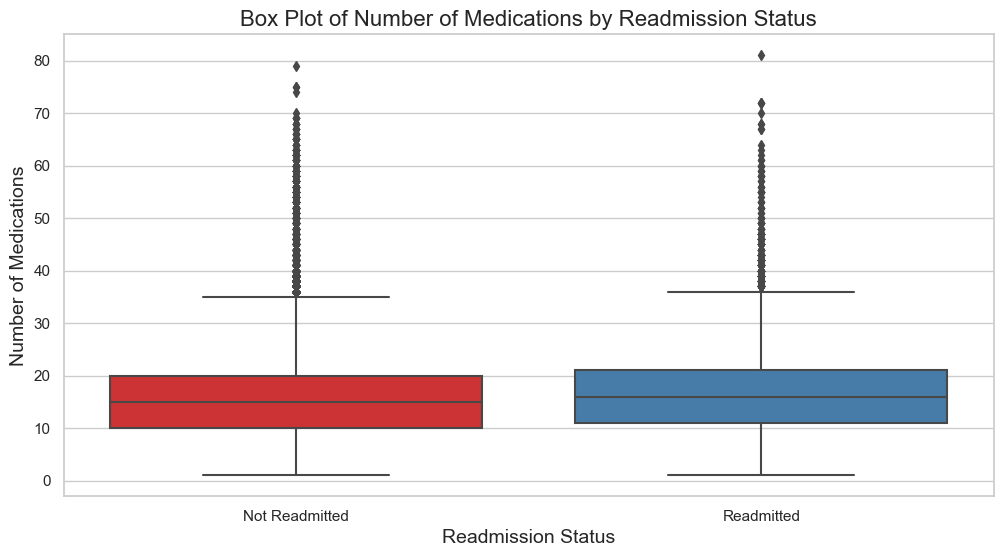

In [291]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='readmitted', y='num_medications', data=df, palette='Set1')
plt.title('Box Plot of Number of Medications by Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=14)
plt.ylabel('Number of Medications', fontsize=14)
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()


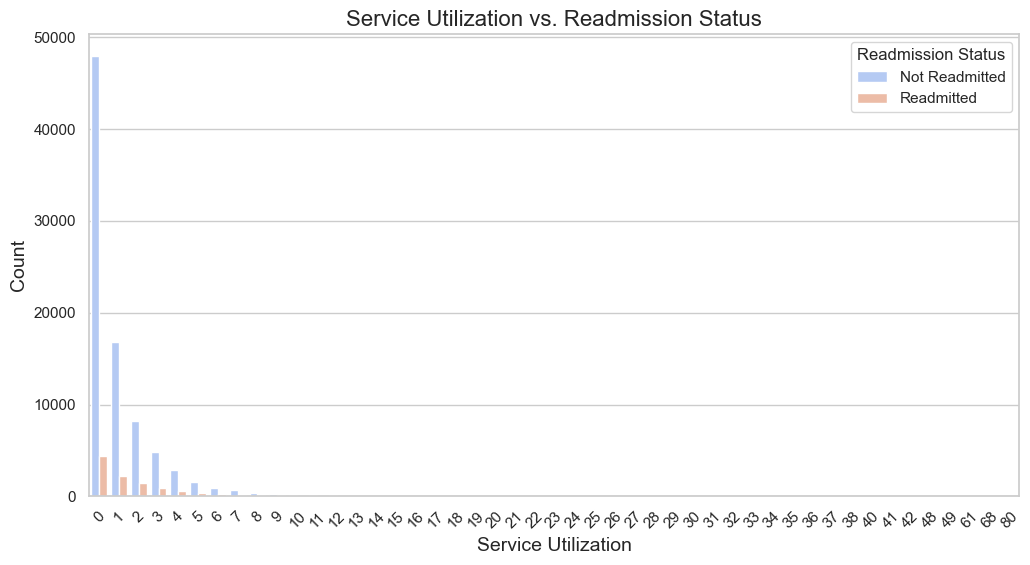

In [292]:
plt.figure(figsize=(12, 6))
sns.countplot(x='service_utilization', hue='readmitted', data=df, palette='coolwarm')
plt.title('Service Utilization vs. Readmission Status', fontsize=16)
plt.xlabel('Service Utilization', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


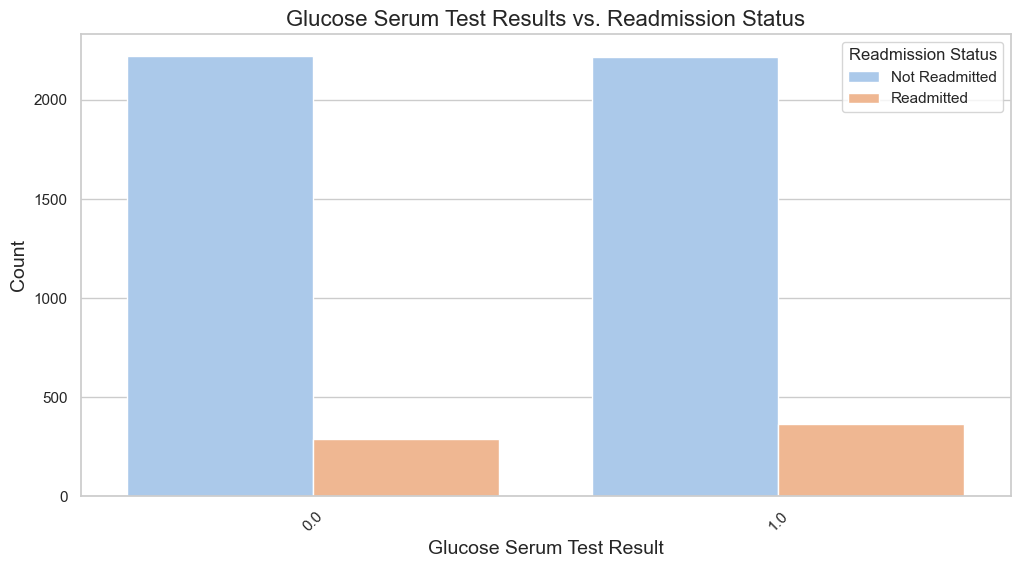

In [293]:
plt.figure(figsize=(12, 6))
sns.countplot(x='max_glu_serum', hue='readmitted', data=df, palette='pastel')
plt.title('Glucose Serum Test Results vs. Readmission Status', fontsize=16)
plt.xlabel('Glucose Serum Test Result', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Readmission Status', labels=['Not Readmitted', 'Readmitted'])
plt.xticks(rotation=45)
plt.show()


In [294]:
# Check which columns exist in your DataFrame
print(df.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'service_utilization', 'num_med_changes', 'level1_diag1',
       'level2_diag1', 'level1_diag2', 'level2_diag2', 'level1_diag3',
       'level2_diag3'],
      dtyp

In [295]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [296]:
# Function for data preprocessing
def preprocess_data(df):
    # Log transformations for selected columns
    df['number_outpatient_log1p'] = np.log1p(df['number_outpatient'])
    df['number_emergency_log1p'] = np.log1p(df['number_emergency'])
    df['number_inpatient_log1p'] = np.log1p(df['number_inpatient'])

    # Feature interactions
    df['num_medications|time_in_hospital'] = df['num_medications'] * df['time_in_hospital']
    df['num_medications|num_procedures'] = df['num_medications'] * df['num_procedures']
    df['time_in_hospital|num_lab_procedures'] = df['time_in_hospital'] * df['num_lab_procedures']

    # Define feature set
    feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 
                   'number_outpatient_log1p', 'number_emergency_log1p', 
                   'number_inpatient_log1p', 'num_medications|time_in_hospital', 
                   'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures']

    # Define X (features) and y (target)
    X = df[feature_set]
    y = df['readmitted']
    
    return X, y

In [297]:
# Function for model evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Report")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [298]:
X, y = preprocess_data(df)

In [299]:
# 2. One-hot encode categorical variables for the entire dataset
X_encoded = pd.get_dummies(X, drop_first=True)

In [300]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, stratify=y, random_state=42)

In [301]:
# 4. Imputation of missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [302]:
# 5. SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imputed, y_train)

In [303]:
# 6. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_imputed)

In [304]:
# 8. Logistic Regression with hyperparameter tuning using RandomizedSearchCV
log_reg = LogisticRegression(class_weight='balanced', solver='liblinear')
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300]
}
random_search = RandomizedSearchCV(log_reg, param_dist, n_iter=20, scoring='f1', cv=5, random_state=42)
random_search.fit(X_train_balanced, y_train_balanced)
evaluate_model(random_search.best_estimator_, X_test_scaled, y_test)


LogisticRegression Report
Accuracy: 0.6609986728599867
Confusion Matrix:
 [[14512  6833]
 [ 1341  1426]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78     21345
           1       0.17      0.52      0.26      2767

    accuracy                           0.66     24112
   macro avg       0.54      0.60      0.52     24112
weighted avg       0.83      0.66      0.72     24112



In [305]:
# 9. Random Forest with hyperparameter tuning using GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring='f1', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

evaluate_model(grid_search_rf.best_estimator_, X_test_scaled, y_test)



RandomForestClassifier Report
Accuracy: 0.6862972793629728
Confusion Matrix:
 [[15485  5860]
 [ 1704  1063]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.80     21345
           1       0.15      0.38      0.22      2767

    accuracy                           0.69     24112
   macro avg       0.53      0.55      0.51     24112
weighted avg       0.82      0.69      0.74     24112



In [306]:
# 10. Decision Tree with hyperparameter tuning using GridSearchCV
dt_model = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, scoring='f1', cv=5, n_jobs=-1)
grid_search_dt.fit(X_train_balanced, y_train_balanced)

# Evaluate Decision Tree
evaluate_model(grid_search_dt.best_estimator_, X_test_scaled, y_test)

DecisionTreeClassifier Report
Accuracy: 0.6606254147312541
Confusion Matrix:
 [[14501  6844]
 [ 1339  1428]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78     21345
           1       0.17      0.52      0.26      2767

    accuracy                           0.66     24112
   macro avg       0.54      0.60      0.52     24112
weighted avg       0.83      0.66      0.72     24112



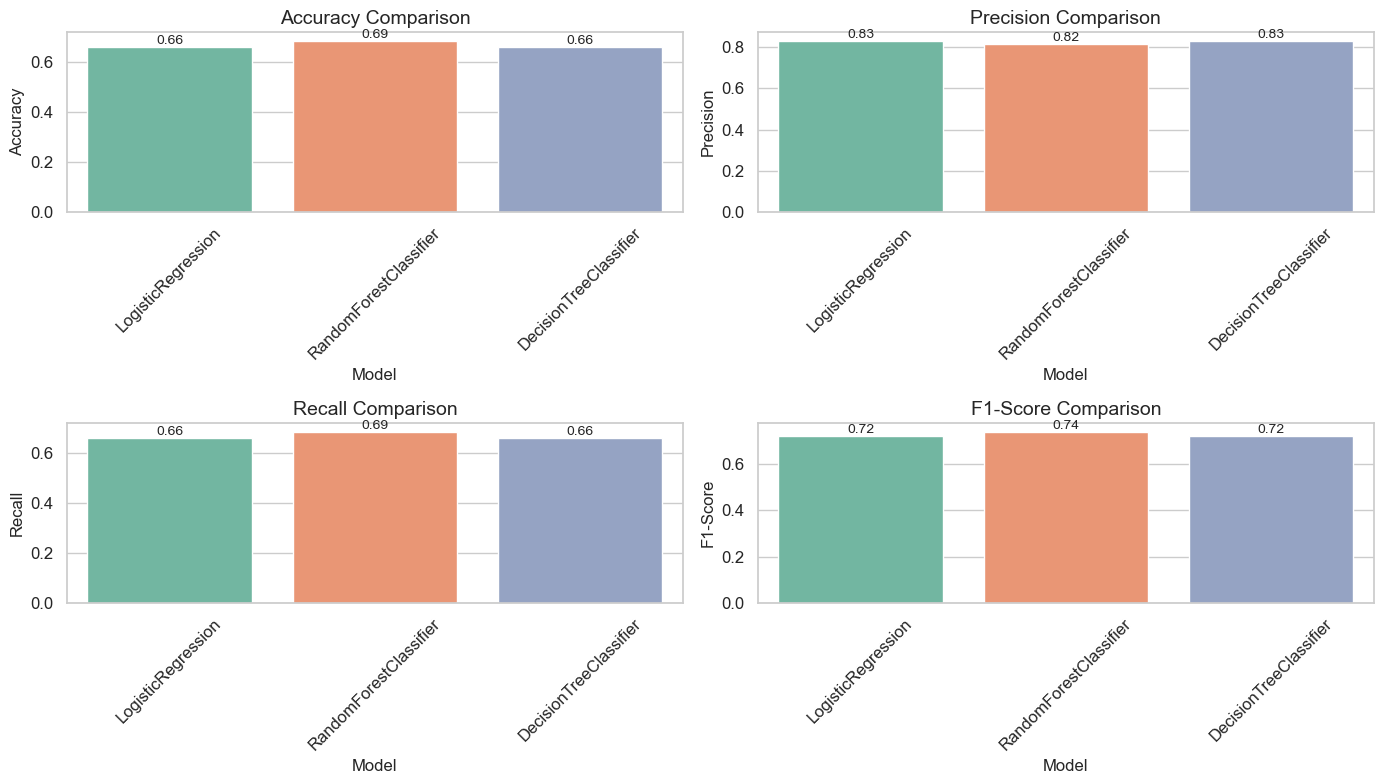

In [311]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

# Collecting the best models
best_models = [
    random_search.best_estimator_,  # Best Logistic Regression model
    grid_search_rf.best_estimator_,  # Best Random Forest model
    grid_search_dt.best_estimator_   # Best Decision Tree model
]

# Function to evaluate and collect metrics for all models
def collect_metrics(models, X_test, y_test):
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-Score': []
    }
    
    for model in models:
        y_pred = model.predict(X_test)
        metrics['Model'].append(model.__class__.__name__)
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        metrics['F1-Score'].append(f1_score(y_test, y_pred, average='weighted'))
    
    return pd.DataFrame(metrics)

# Function to plot the comparison of models with value labels
def plot_model_comparison(df_metrics):
    plt.figure(figsize=(14, 8))
    
    # Define a color palette for distinct model bars
    palette = sns.color_palette('Set2', len(df_metrics['Model'].unique()))
    
    # Plot accuracy comparison
    plt.subplot(2, 2, 1)
    ax = sns.barplot(x='Model', y='Accuracy', data=df_metrics, palette=palette)
    for container in ax.containers:  # Add value labels
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    plt.title('Accuracy Comparison', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Plot precision comparison
    plt.subplot(2, 2, 2)
    ax = sns.barplot(x='Model', y='Precision', data=df_metrics, palette=palette)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    plt.title('Precision Comparison', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Plot recall comparison
    plt.subplot(2, 2, 3)
    ax = sns.barplot(x='Model', y='Recall', data=df_metrics, palette=palette)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    plt.title('Recall Comparison', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Plot F1-Score comparison
    plt.subplot(2, 2, 4)
    ax = sns.barplot(x='Model', y='F1-Score', data=df_metrics, palette=palette)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    plt.title('F1-Score Comparison', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Collect metrics and plot the comparison
df_metrics = collect_metrics(best_models, X_test_scaled, y_test)
plot_model_comparison(df_metrics)


In [312]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Function for model evaluation
def evaluate_model(model, X_test, y_test, X_train=None, y_train=None, cv_folds=5):
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)  # output_dict for easier access
    
    # Calculate ROC AUC if y_test is binary
    if len(set(y_test)) == 2:  # Ensure it's binary classification
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None  # Not applicable for non-binary classification

    # Cross-validation scores
    if X_train is not None and y_train is not None:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc' if roc_auc is not None else 'f1')
    else:
        cv_scores = None

    # Create a dictionary to store metrics
    metrics = {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'ROC AUC': roc_auc,
        'Cross-Validation Scores': cv_scores
    }
    
    return metrics


In [316]:
import pprint
# Evaluate Logistic Regression with cross-validation
log_reg_metrics = evaluate_model(random_search.best_estimator_, X_test_scaled, y_test, X_train_scaled, y_train_balanced)
pprint.pprint(log_reg_metrics)




{'Accuracy': 0.6609986728599867,
 'Classification Report': {'0': {'f1-score': 0.7802570030646809,
                                 'precision': 0.9154103324291932,
                                 'recall': 0.6798781916139611,
                                 'support': 21345.0},
                           '1': {'f1-score': 0.25866134590966805,
                                 'precision': 0.17266012834483593,
                                 'recall': 0.5153595952294904,
                                 'support': 2767.0},
                           'accuracy': 0.6609986728599867,
                           'macro avg': {'f1-score': 0.5194591744871745,
                                         'precision': 0.5440352303870146,
                                         'recall': 0.5976188934217257,
                                         'support': 24112.0},
                           'weighted avg': {'f1-score': 0.7204006998402317,
                                            'precision'

In [317]:
# Evaluate Random Forest with cross-validation
rf_metrics = evaluate_model(grid_search_rf.best_estimator_, X_test_scaled, y_test, X_train_scaled, y_train_balanced)
pprint.pprint(rf_metrics)



{'Accuracy': 0.6862972793629728,
 'Classification Report': {'0': {'f1-score': 0.8037058182384388,
                                 'precision': 0.9008668334399907,
                                 'recall': 0.7254626376200516,
                                 'support': 21345.0},
                           '1': {'f1-score': 0.2194014447884417,
                                 'precision': 0.15354615051278347,
                                 'recall': 0.3841705818576075,
                                 'support': 2767.0},
                           'accuracy': 0.6862972793629728,
                           'macro avg': {'f1-score': 0.5115536315134402,
                                         'precision': 0.5272064919763871,
                                         'recall': 0.5548166097388295,
                                         'support': 24112.0},
                           'weighted avg': {'f1-score': 0.7366533049116246,
                                            'precision':

In [318]:
# Evaluate Decision Tree with cross-validation
dt_metrics = evaluate_model(grid_search_dt.best_estimator_, X_test_scaled, y_test, X_train_scaled, y_train_balanced)
pprint.pprint(dt_metrics)

{'Accuracy': 0.6606254147312541,
 'Classification Report': {'0': {'f1-score': 0.7799381471023262,
                                 'precision': 0.9154671717171717,
                                 'recall': 0.6793628484422581,
                                 'support': 21345.0},
                           '1': {'f1-score': 0.258719086873811,
                                 'precision': 0.17263056092843326,
                                 'recall': 0.5160823997108782,
                                 'support': 2767.0},
                           'accuracy': 0.6606254147312541,
                           'macro avg': {'f1-score': 0.5193286169880686,
                                         'precision': 0.5440488663228025,
                                         'recall': 0.5977226240765682,
                                         'support': 24112.0},
                           'weighted avg': {'f1-score': 0.720125060686753,
                                            'precision': 0

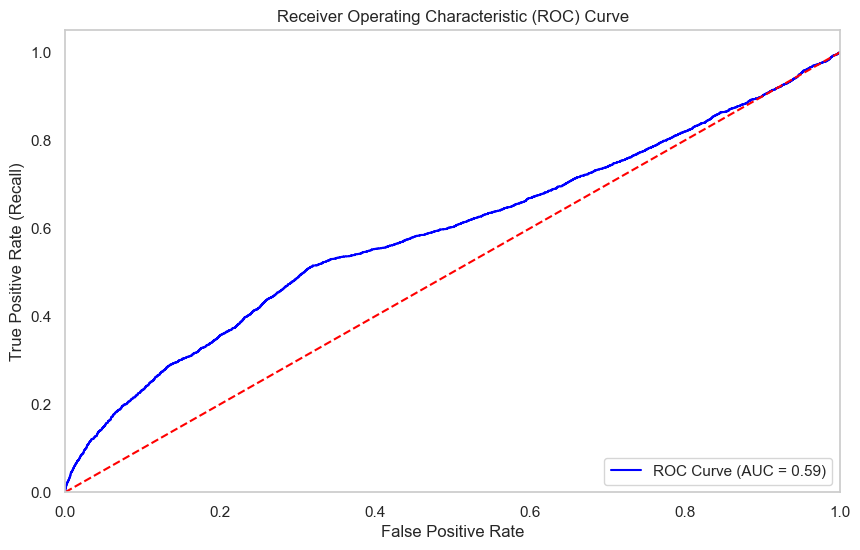

In [319]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test):
    # Get the predicted probabilities for the positive class
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_prob)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Example usage with your best Logistic Regression model
plot_roc_curve(random_search.best_estimator_, X_test_scaled, y_test)


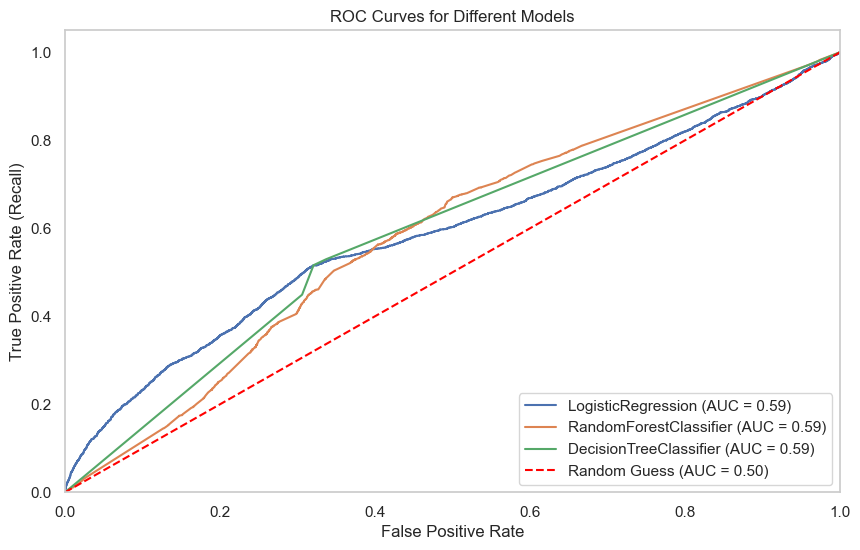

In [320]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curves for multiple models
def plot_multiple_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for model in models:
        # Get predicted probabilities for the positive class
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        
        # Calculate AUC
        auc = roc_auc_score(y_test, y_prob)
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {auc:.2f})')

    # Plotting the diagonal line for chance level
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess (AUC = 0.50)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curves for Different Models')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Collect the best models
best_models = [
    random_search.best_estimator_,  # Best Logistic Regression model
    grid_search_rf.best_estimator_,  # Best Random Forest model
    grid_search_dt.best_estimator_   # Best Decision Tree model
]

# Compare ROC curves
plot_multiple_roc_curves(best_models, X_test_scaled, y_test)
